# TP 2 - Reconstrucción 3D

In [45]:
import pickle as pkl
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os 
import sys
import open3d as o3d
import calib

In [2]:
image_path_left = 'data/captures/left_3.jpg'
image_path_right = 'data/captures/left_3.jpg'
#read images as rgb

imgL = cv.imread(image_path_left)
imgR = cv.imread(image_path_right)

In [3]:
# Parámetros stereo maps
#open pickel file
with open('data/stereo_maps.pkl', 'rb') as f:
    mat_dict = pkl.load(f)

In [4]:
print(mat_dict['Q'])
print(mat_dict.keys())

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -9.70262848e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -5.39484238e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.00600906e+02]
 [ 0.00000000e+00  0.00000000e+00  1.66848275e-02 -0.00000000e+00]]
dict_keys(['left_map_x', 'left_map_y', 'right_map_x', 'right_map_y', 'R1', 'R2', 'P1', 'P2', 'Q', 'validRoi1', 'validRoi2'])


In [5]:
# Parametros stereo calibration
with open ('data/stereo_calibration.pkl', 'rb') as f:
    stereo_calib = pkl.load(f)

In [6]:
print(stereo_calib.keys())
print(stereo_calib['left_K'])
print(stereo_calib['left_dist'])

dict_keys(['left_K', 'left_dist', 'right_K', 'right_dist', 'R', 'T', 'E', 'F', 'image_size'])
[[601.92838937   0.         959.61909931]
 [  0.         602.57590677 547.75865163]
 [  0.           0.           1.        ]]
[[ 1.81316452e-03 -2.16045131e-02 -6.59116213e-04  9.60877050e-05
   3.24259481e-03]]


In [7]:
def show_rectified_images(left_image, right_image, stereo_maps, save_path=None, n_image=0, plot_images=True):
    # Extract rectification maps
    left_map_x = stereo_maps["left_map_x"]
    left_map_y = stereo_maps["left_map_y"]
    right_map_x = stereo_maps["right_map_x"]
    right_map_y = stereo_maps["right_map_y"]

    # Rectify the images
    left_rectified = cv.remap(left_image, left_map_x, left_map_y, cv.INTER_LINEAR)
    right_rectified = cv.remap(right_image, right_map_x, right_map_y, cv.INTER_LINEAR)

    # Stack original and rectified images horizontally
    original_images = np.hstack((left_image, right_image))
    rectified_images = np.hstack((left_rectified, right_rectified))

    if plot_images:
        # Plot images using matplotlib
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))

        # Plot original images with epipolar lines
        axes[0].imshow(cv.cvtColor(original_images, cv.COLOR_BGR2RGB))
        axes[0].set_title("Original Images with Epipolar Lines")
        for y in np.linspace(0, original_images.shape[0], 4, endpoint=False):
            axes[0].axhline(y, color='r', linestyle='--', linewidth=0.5)

        # Plot rectified images with epipolar lines
        axes[1].imshow(cv.cvtColor(rectified_images, cv.COLOR_BGR2RGB))
        axes[1].set_title("Rectified Images with Epipolar Lines")
        for y in np.linspace(0, rectified_images.shape[0], 4, endpoint=False):
            axes[1].axhline(y, color='r', linestyle='--', linewidth=0.5)

        plt.show()

    if save_path:
        # Save rectified images
        # Create directory if it does not exist
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        left_rectified_path = f"{save_path}/rectified_left_{n_image}.png"
        right_rectified_path = f"{save_path}/rectified_right_{n_image}.png"
        cv.imwrite(left_rectified_path, left_rectified)
        cv.imwrite(right_rectified_path, right_rectified)
        print(f"Rectified images saved to {save_path}")  

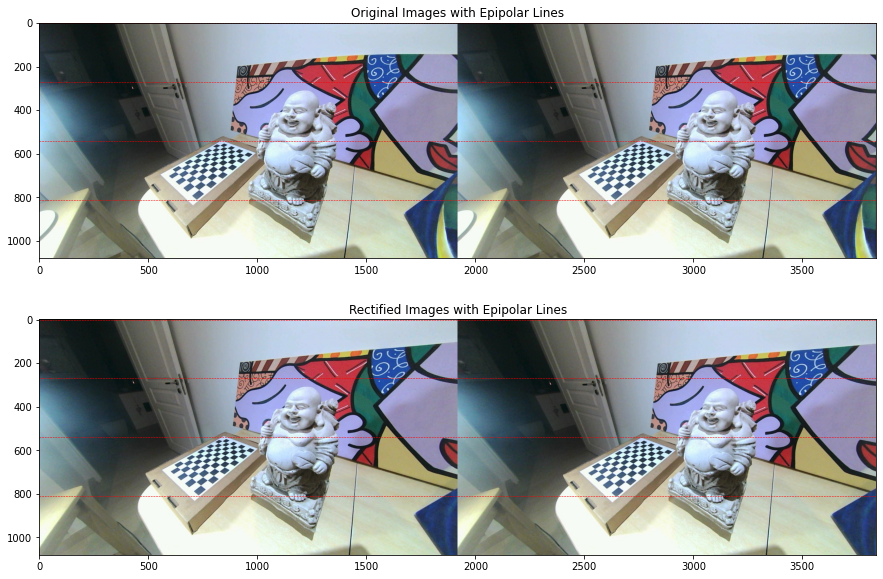

In [8]:
show_rectified_images(imgL, imgR, mat_dict, plot_images=True)



In [9]:
# Bucle para guardar todas las imágenes rectificadas
for i in range(0, 6):
    image_path_left = f'data/captures/left_{i}.jpg'
    image_path_right = f'data/captures/right_{i}.jpg'
    # Leer imágenes como RGB
    imgL = cv.imread(image_path_left, 0)
    imgR = cv.imread(image_path_right, 0)
    show_rectified_images(imgL, imgR, mat_dict, save_path='data/rectified_images', n_image=i, plot_images=False)
    print(f"Rectified images {i} saved")
print("All images saved")
    

Rectified images saved to data/rectified_images
Rectified images 0 saved
Rectified images saved to data/rectified_images
Rectified images 1 saved
Rectified images saved to data/rectified_images
Rectified images 2 saved
Rectified images saved to data/rectified_images
Rectified images 3 saved
Rectified images saved to data/rectified_images
Rectified images 4 saved
Rectified images saved to data/rectified_images
Rectified images 5 saved
All images saved


In [10]:
#importamos el código de gaston para construir mapas de disparidad de cada par de imágenes rectificadas
from disparity_example import *

In [11]:
calibration_path = "/Users/brunocr/Desktop/UDESA/Visión Artificial/TP2_Reconstruccion3D/VA_TP2/calibration_tool/data/rectified_images/stereodemo_calibration.json"

for i in range (0, 6):
    left_image = cv2.imread(f"/Users/brunocr/Desktop/UDESA/Visión Artificial/TP2_Reconstruccion3D/VA_TP2/calibration_tool/data/rectified_images/rectified_left_{i}.png")
    right_image = cv2.imread(f"/Users/brunocr/Desktop/UDESA/Visión Artificial/TP2_Reconstruccion3D/VA_TP2/calibration_tool/data/rectified_images/rectified_right_{i}.png")
    create_disparity_map(left_image, right_image, i, calibration_path, "CREStereo", save=True, show=False)

Computing disparity...


/Users/brunocr/opt/anaconda3/envs/stereodemoenv/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Computing disparity...
Computing disparity...
Computing disparity...
Computing disparity...
Computing disparity...


In [47]:
def generate_centered_pcd(disparity_map, left_image, Q_mat, left_K, left_distortion, box_extent = 1000, chackerboard_dim = (10,7), square_size_mm = 24.2):
    points_3D = cv2.reprojectImageTo3D(disparity_map, Q_mat)
    mask = disparity_map > 0
    points_3D = points_3D[mask]

    left_found, left_corners = calib.detect_board(chackerboard_dim, left_image)
    object_3dpoints = calib.board_points(chackerboard_dim)
    object_3dpoints_mm = object_3dpoints * square_size_mm
    ret, rvec, tvec = cv.solvePnP(
        object_3dpoints_mm,
        left_corners,
        left_K,
        left_distortion,
        flags=cv.SOLVEPNP_IPPE
        )
    c_R_o = cv.Rodrigues(rvec)
    c_T_o = np.column_stack((c_R_o[0], tvec))
    c_T_o = np.vstack((c_T_o, [0, 0, 0, 1]))
    o_T_c = np.linalg.inv(c_T_o)
    
    points_homogeneous = np.hstack((points_3D, np.ones((points_3D.shape[0], 1))))

    # Apply the 4x4 transformation matrix
    points_transformed_homogeneous = (o_T_c @ points_homogeneous.T).T

    # Convert back to 3D by dropping the homogeneous coordinate
    points_transformed = points_transformed_homogeneous[:, :3]

    # Visualize with Open3D
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points_transformed)

    # Optionally, add coordinate frames for context
    world_center = np.array([0, 0, 0])  # Center at the world origin
    world_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=200, origin=[0, 0, 0])
    camera_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=200)
    camera_frame.transform(o_T_c)  # Apply the 4x4 transformation

    extent = box_extent  # Define an extent in meters (half-length of each bounding box side)
    bounding_box = o3d.geometry.OrientedBoundingBox(center=world_center, R=np.eye(3), extent=[extent, extent, extent])
    indices = bounding_box.get_point_indices_within_bounding_box(pcd.points)
    pcd_filtered = pcd.select_by_index(indices)

    return (pcd_filtered, camera_frame)



In [50]:
pcd_camera_tuples = []
for i in range (6):
    disparity_files = np.load(f'mapas_disparidad/disparity_{i}.npz')
    disparity_mat = disparity_files['arr_0']
    left_image = cv2.imread(f"/Users/brunocr/Desktop/UDESA/Visión Artificial/TP2_Reconstruccion3D/VA_TP2/calibration_tool/data/rectified_images/rectified_left_{i}.png")
    left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    pcd_camera_tuples.append(generate_centered_pcd(disparity_mat, left_gray, mat_dict['Q'], stereo_calib['left_K'], stereo_calib['left_dist']))

    


In [51]:
flattened_list = [item for tup in pcd_camera_tuples for item in tup]
# Display the transformed point cloud in the world frame
o3d.visualization.draw_geometries(flattened_list)